# TELECOM CUSTOMER CHURN PREDICTION PROJECT

# Introduction

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

# Goal

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customer churn and identify the main indicators of churn.

### Data Schema

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The “Churn” column is our target.

customerID-- Customer ID

gender--  Whether the customer is a male or a female

SeniorCitizen-- Whether the customer is a senior citizen or not
Partner-- Whether the customer has a partner or not 
Dependents-- Whether the customer has dependents or not 

tenure-- Number of months the customer has stayed with the company

PhoneService-- Whether the customer has a phone service or not 
MultipleLines-- Whether the customer has multiple lines or not
nternetService-- Customer’s internet service provider
OnlineSecurity-- Whether the customer has online security or not
OnlineBackup-- Whether the customer has online backup or not
DeviceProtection-- Whether the customer has device protection or not
TechSupport-- Whether the customer has tech support or not
StreamingTV-- Whether the customer has streaming TV or not
StreamingMovies-- Whether the customer has streaming movies or not

Contract-- The contract term of the customer 
PaperlessBilling-- Whether the customer has paperless billing or not 
PaymentMethod-- The customer’s payment method

MonthlyCharges-- The amount charged to the customer monthly(in USD)
TotalCharges-- The total amount charged to the customer(in USD)

Churn-- Whether the customer churned or not

In [31]:
#importing required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data

In [32]:
df = pd.read_excel(r"C:\Users\Akanksha\Downloads\Datasets\Telco-Customer-Churn.xlsx")

In [33]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration and Validation

In [34]:
df.shape

(7043, 21)

In [35]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [39]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


# Exploratory Data Analysis and Feature Engineering

In [40]:
# Droping the 'customer Id' column as it does not have any effect on / direct relation with the churn rate

df.drop(['customerID'],axis=1,inplace=True) 

In [41]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

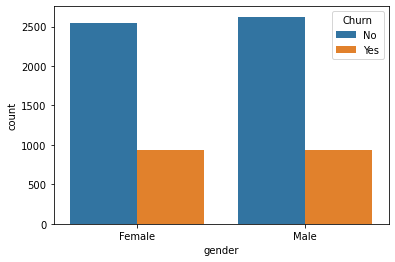

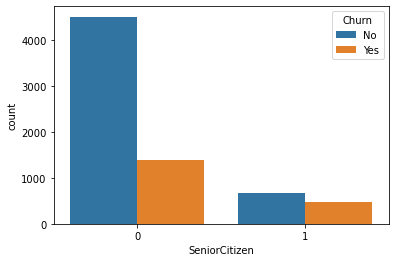

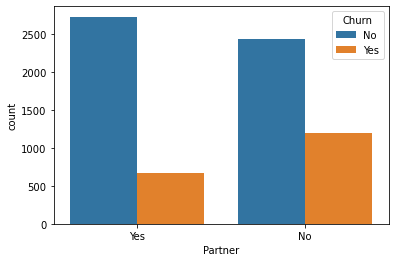

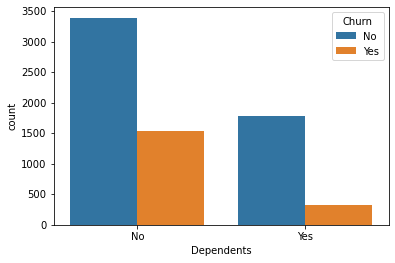

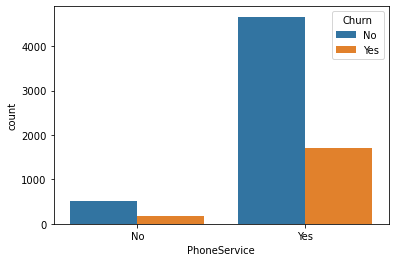

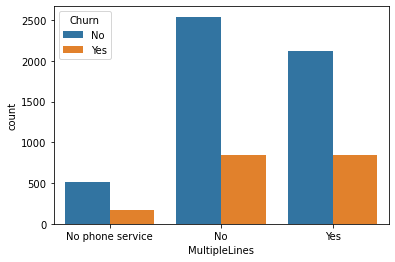

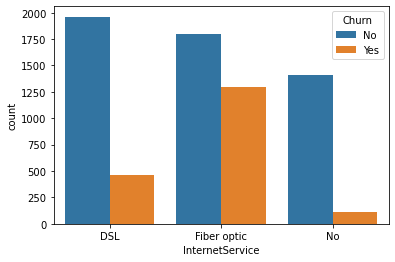

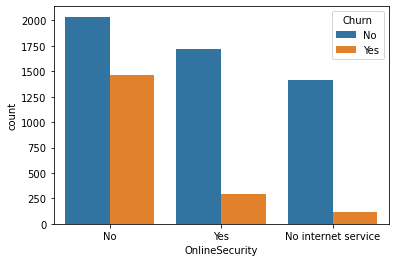

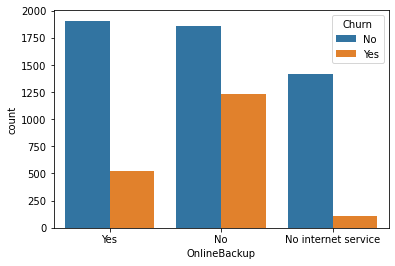

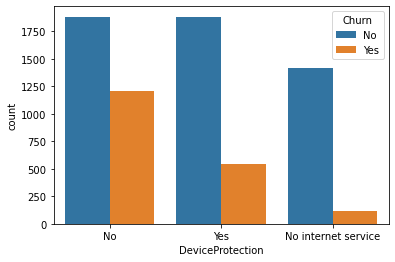

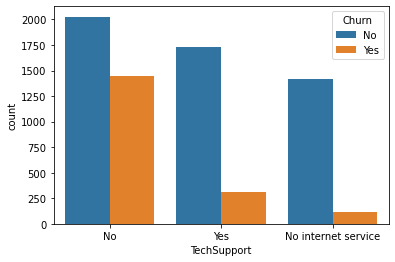

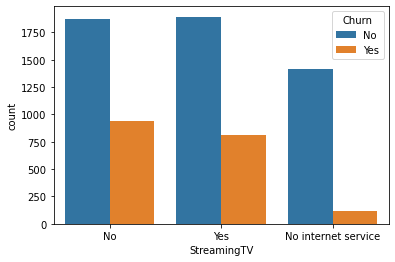

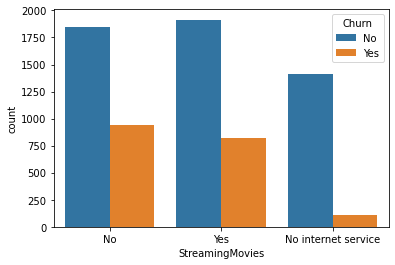

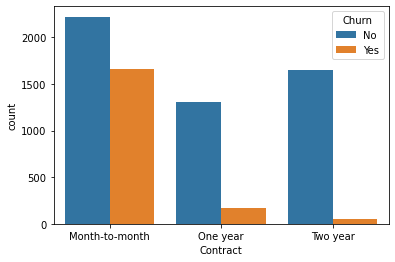

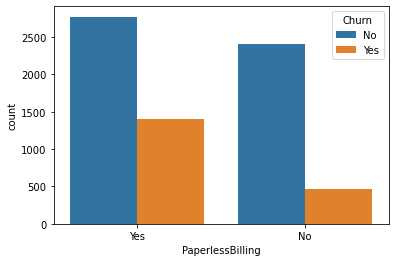

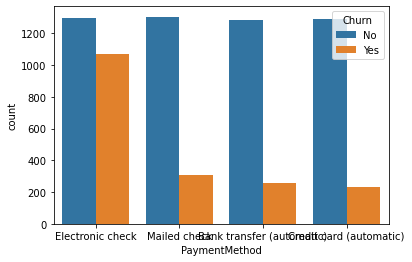

In [42]:
#checking the distribution of each feature with respect to churn  

for i, feature in enumerate(df.drop(columns=['tenure','Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=feature, hue='Churn')

Insights from above distribution

1.feature like gender, senior citizen ,partner ,dependents has very little impact on the churn rate.

2.feature like phone service ,multiple lines,internet services,online security,online backup,device protection,tech support,paperless billing,payment method has greatly affected the churn rate.

3.streaming tv,streaming movies has very negligible effect on churn rate.

4.contract has a huge impact on churn rate.

In [43]:
tenure=df['tenure'].unique()

In [44]:
np.sort(tenure)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

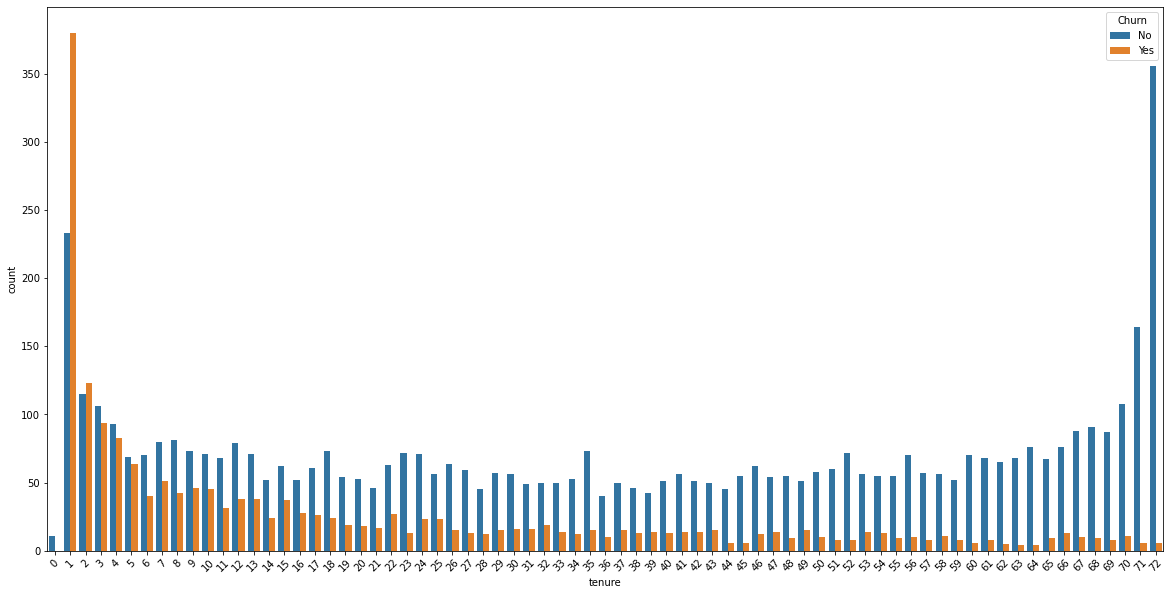

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(x='tenure',hue='Churn',data=df,)
plt.xticks(rotation=45)
plt.show()

In [46]:
#Grouping the tenure values and converting it into categorical variable

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

In [47]:
df['tenure_group'] = pd.cut(df.tenure, range(1, 75, 12), right=False, labels=labels)

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [49]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [50]:
df.drop(['tenure'],axis=1,inplace=True)

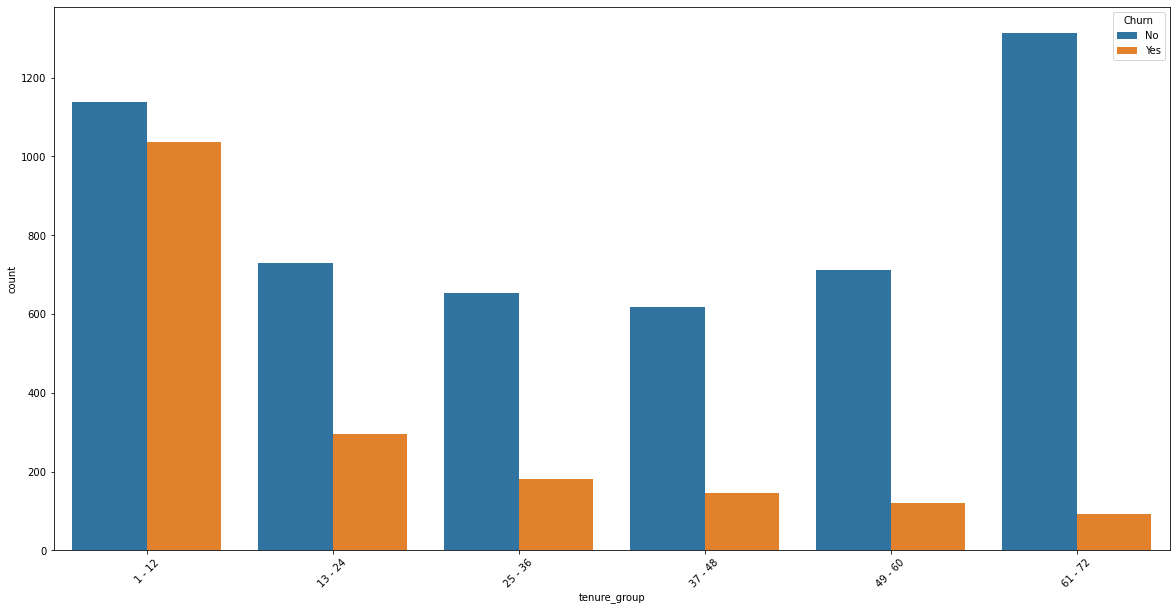

In [51]:
#distribution of tenure_groups with respect to churn rate

plt.figure(figsize=(20,10))
sns.countplot(x='tenure_group',hue='Churn',data=df,)
plt.xticks(rotation=45)
plt.show()

In [52]:
# the customers are most likely to churn in first 1-12 months.

In [53]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
tenure_group        11
dtype: int64

In [54]:
df.loc[df ['tenure_group'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


In [55]:
#out of 7043 record only 11 records contain the missing values which comprises just 0.15% of the data ,so droping those records won't have much effect.

In [56]:
#droping the missing value records

df.dropna(how='any',inplace=True)

In [57]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [58]:
# checking the distribution of monthy charges and total charges withe respect to tenure and churn rate

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

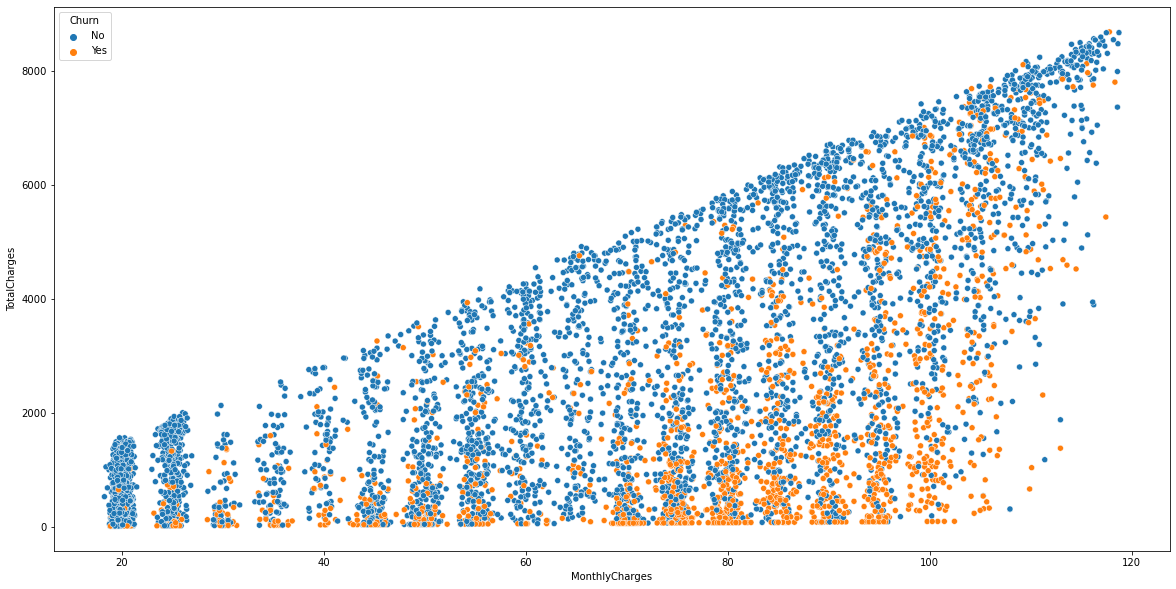

In [59]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['MonthlyCharges'],y=df['TotalCharges'],hue=df['Churn'],data=df) 

<AxesSubplot:xlabel='tenure_group', ylabel='MonthlyCharges'>

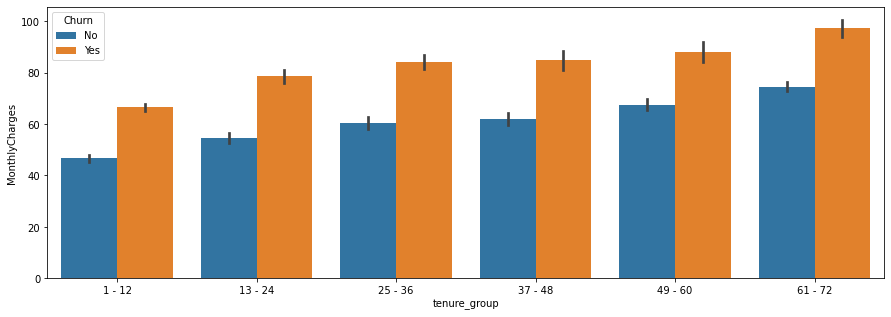

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['tenure_group'],y=df['MonthlyCharges'],hue=df['Churn'],data=df)


Text(0.5, 1.0, 'Monthly charges by churn')

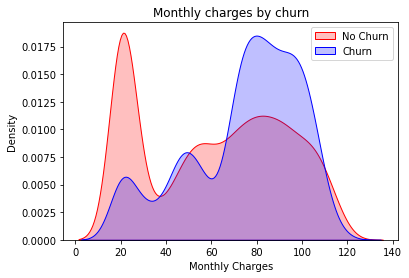

In [61]:
Mth=sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],color="Red", shade = True)
Mth=sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0, 0.5, 'Density')

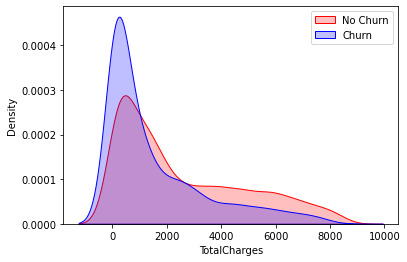

In [62]:
TC=sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],color="Red", shade = True)
TC=sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],ax =TC, color="Blue", shade= True)
TC.legend(["No Churn","Churn"],loc='upper right')
TC.set_ylabel('Density')

Insights from above ditribution

1. As the monthly charges exceeds 60 USD the churn rate significantly increases.
2. Churn rate decreases as the total charges exeeds the 2000USD. 

<Figure size 432x288 with 0 Axes>

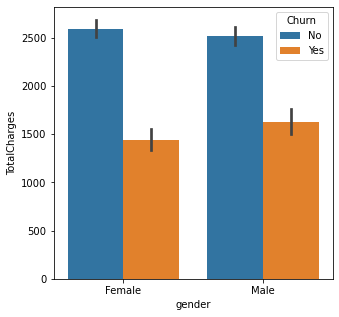

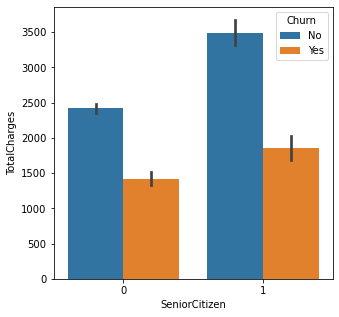

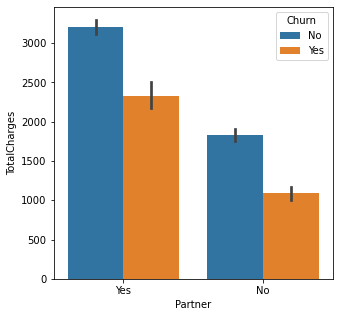

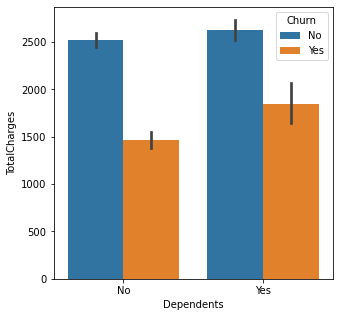

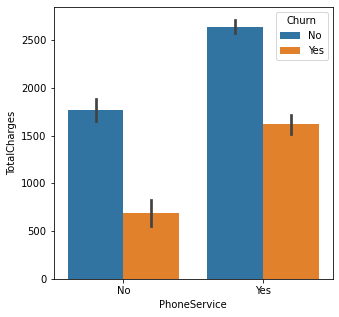

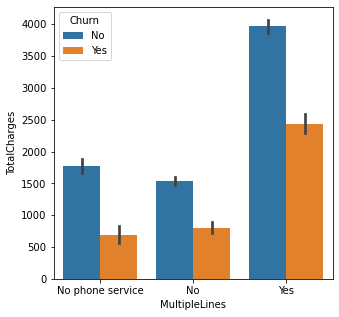

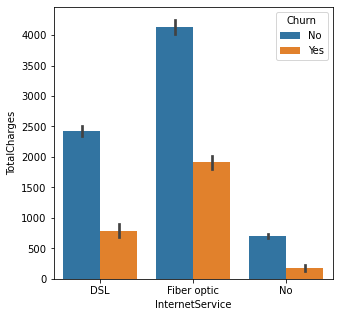

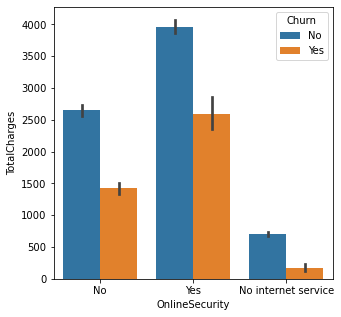

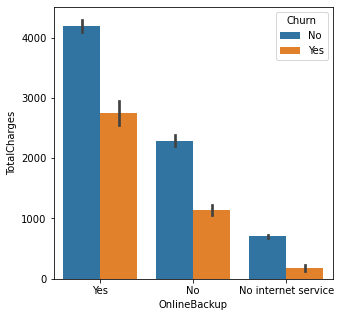

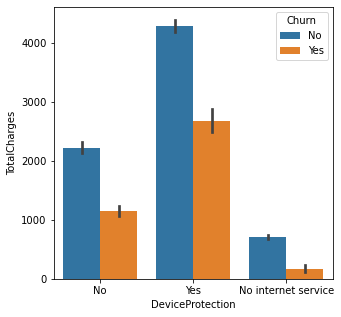

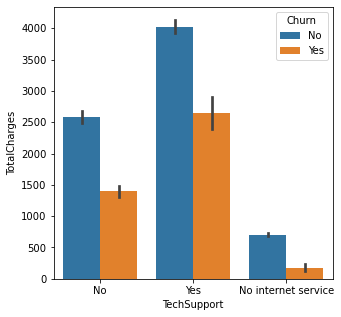

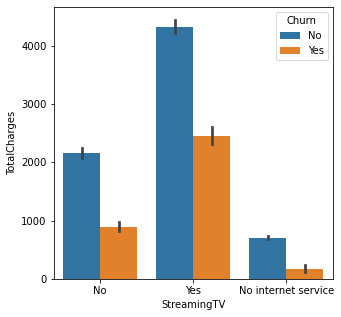

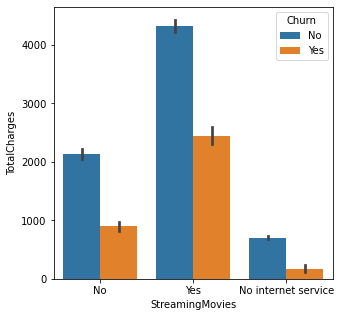

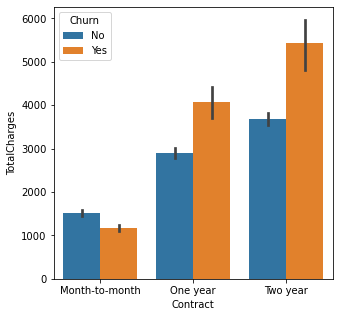

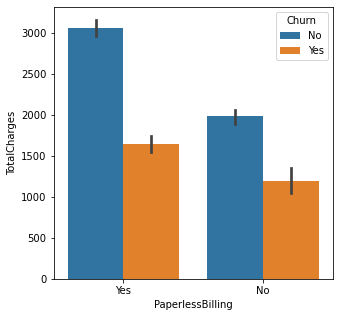

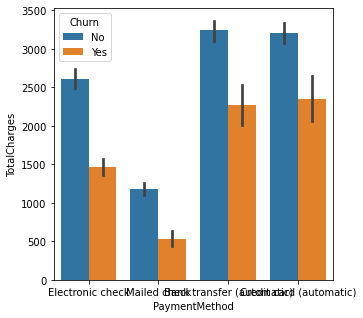

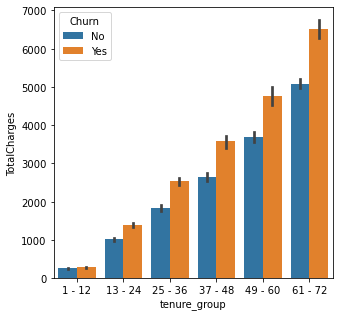

In [63]:
#the distribution of monthly charges,total charges and churn with respect to every feature

for i, feature in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    plt.figure(figsize=(5,5))
    sns.barplot(x=feature,y=df['TotalCharges'],hue=df['Churn'], data=df)

SeniorCitizen        AxesSubplot(0.125,0.71587;0.168478x0.16413)
MonthlyCharges    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
TotalCharges      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
dtype: object

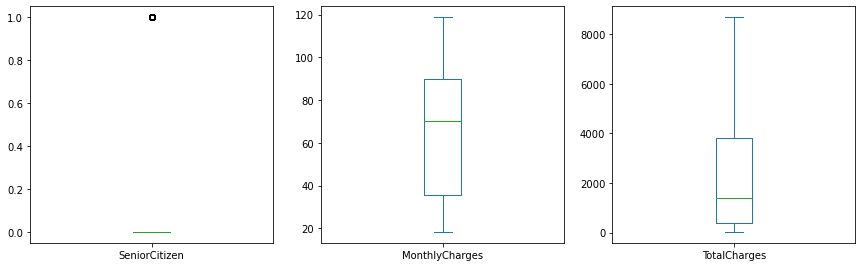

In [64]:
df.plot(kind="box", subplots=True,layout=(4,4) ,figsize=(20,20))

In [65]:
#Replacing the target variables 'yes' and 'No' with binary variable 1 and 0 respectively

df['Churn']=np.where(df.Churn =='Yes',1,0)

In [66]:
#converting all the categorical features into numerical features

In [67]:
df_dummies = pd.get_dummies(df,drop_first = True)
df_dummies

,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,56.95,1889.50,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,53.85,108.15,1,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,42.30,1840.75,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,1,0,1,1,1,0,1,...,0,1,0,0,1,1,0,0,0,0
7039,103.20,7362.90,0,0,0,1,1,1,0,1,...,0,1,1,0,0,0,0,0,0,1
7040,29.60,346.45,0,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
7041,74.40,306.60,1,1,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0


In [68]:
#df['gender']=np.where(df.gender =='Female',1,0)

In [69]:
#df['Partner']=np.where(df.Partner =='Yes',1,0)
#df['Dependents']=np.where(df.Dependents =='Yes',1,0)
#df['PhoneService']=np.where(df.PhoneService =='Yes',1,0)
#df['PaperlessBilling']=np.where(df.PaperlessBilling =='Yes',1,0)

In [70]:
#dict_1 = {'No':0,'Yes':1,'No phone service':2}

In [71]:
#df.replace({'MultipleLines': {'No':0,'Yes':1,'No phone service':2}},inplace=True)
#({'OnlineBackup': {'No':0,'Yes':1,'No internet service':2}},inplace=True)
#df.replace({'DeviceProtection': {'No':0,'Yes':1,'No internet service':2}},inplace=True)
#df.replace({'TechSupport': {'No':0,'Yes':1,'No internet service':2}},inplace=True)
#df.replace({'StreamingTV': {'No':0,'Yes':1,'No internet service':2}},inplace=True)
#df.replace({'StreamingMovies': {'No':0,'Yes':1,'No internet service':2}},inplace=True)

In [72]:
#df.replace({'InternetService': {'No':0,'DSL':1,'Fiber optic':2}},inplace=True)
#df.replace({'Contract': {'Month-to-month':0,'One year':1,'Two year':2}},inplace=True)
#df.replace({'PaymentMethod': {'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3,'Credit card (automatic)':4}},inplace=True)

In [73]:
#df['tenure_group'].value_counts()

In [74]:
#df.replace({'tenure_group': {'1 - 12':0,'13 - 24':1,'25 - 36':2,'37 - 48':3,'49 - 60':4,'61 - 72':5}},inplace=True)

<AxesSubplot:>

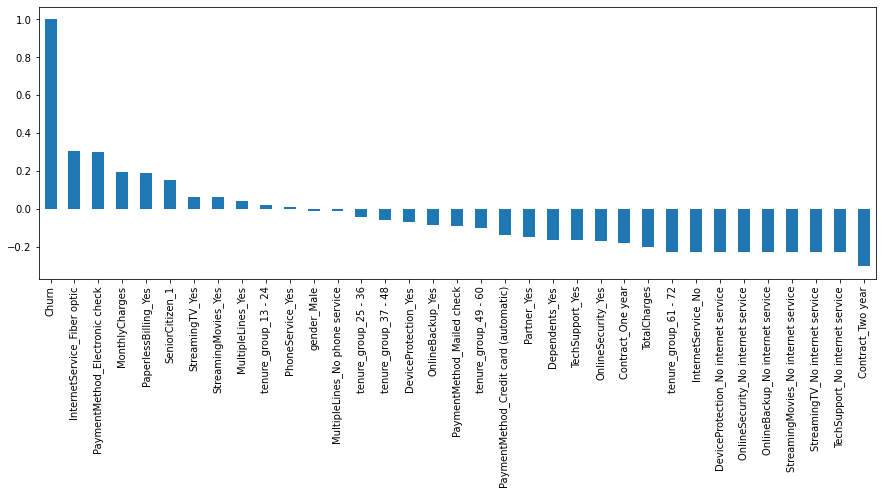

In [117]:
#plotting the correlation graph
plt.figure(figsize=(15,5))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

These are some of the quick insights from the EDA:

HIGH Churn is seen in case of Non senior Citizens, Month to month contracts, No online security, No Tech support,No device protection, First year of subscription and Fibre Optics Internet,Electronic check payment mode

LOW Churn is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and of multiple lines have alomost NO impact on Churn


In [76]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

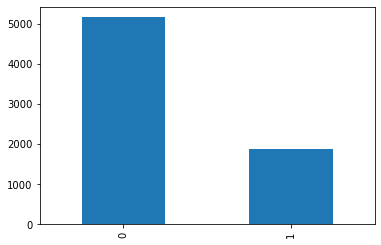

In [77]:
df['Churn'].value_counts().plot(kind='bar')

In [78]:
100*df['Churn'].value_counts()/len(df['Churn'])

0    73.421502
1    26.578498
Name: Churn, dtype: float64

The data is imbanlanced as the target variables are in the ratio 73:27.

# Model building and training

In [79]:
#installing imbalance-learn library
!pip install imblearn

In [80]:
#importing necessary libraries 
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [81]:
#defining the train and test features

x = df_dummies.drop('Churn',axis=1)

In [82]:
x.head()

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,56.95,1889.50,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,53.85,108.15,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,42.30,1840.75,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,70.70,151.65,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [83]:
y = df_dummies['Churn']

In [84]:
#Splitting the data into train and test data sets

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [85]:
# Training and testing the decision tree classifier model

DT_model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=10)

In [86]:
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=100)

In [87]:
y_pred = DT_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [88]:
#checking the accuracy of model

DT_model.score(x_test,y_test)

0.7924662402274343

In [89]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, labels=[0,1]))

[[927  98]
 [194 188]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1025
           1       0.66      0.49      0.56       382

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [90]:
#traing and testing logistic regression model 

from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(random_state=0).fit(x_train,y_train)

In [91]:
log_r.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
#checking the accuracy

log_r.score(x_test,y_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, labels=[0,1]))

[[927  98]
 [194 188]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1025
           1       0.66      0.49      0.56       382

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
#creating random forest classifier model.

In [95]:
RF_model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [96]:
#checking the accuracy

RF_model.fit(x_train,y_train)

y_pred = RF_model.predict(x_test)

print(RF_model.score(x_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, labels=[0,1]))

0.7938877043354655
[[972  53]
 [237 145]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1025
           1       0.73      0.38      0.50       382

    accuracy                           0.79      1407
   macro avg       0.77      0.66      0.69      1407
weighted avg       0.78      0.79      0.77      1407



As the data is highly imbalanced the accuracy is quite low and the parameters precision ,recall and f1-score are also very low for class 1 i.e.'churners'
    
so to increase the accuracy ,precision,recall and f1-score , the data should be balanced using various undersampling and oversampling techniques or combination of both.
    

In [ ]:
# using the SMOTEENN technique i.e.the combination of undersampling and oversampling

sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x_train,y_train)

In [98]:
#Spliting the resampled data into train and test

xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled, y_resampled,test_size=0.2)

In [99]:
#Creating a decision tree classifier model using smoteenn sampling

model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [100]:
#Fitting the model and checking the scores

model_dt_smote.fit(xr_train,yr_train)

yr_pred_dt = model_dt_smote.predict(xr_test)

dt_smote_score = model_dt_smote.score(xr_test,yr_test)

print(dt_smote_score)
print(confusion_matrix(yr_test,yr_pred_dt))
print(classification_report(yr_test,yr_pred_dt))

0.9064516129032258
[[372  60]
 [ 27 471]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       432
           1       0.89      0.95      0.92       498

    accuracy                           0.91       930
   macro avg       0.91      0.90      0.91       930
weighted avg       0.91      0.91      0.91       930



In [101]:
#creating random forest classifier model using smoteenn sampling

model_rf_smote=RandomForestClassifier()

In [102]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier()

In [103]:
#checking the accuracy

yr_pred_rf = model_rf_smote.predict(xr_test)

rf_smote_score = model_rf_smote.score(xr_test,yr_test)

print(rf_smote_score)
print(confusion_matrix(yr_test,yr_pred_rf))
print(classification_report(yr_test,yr_pred_rf))

0.9473118279569892
[[401  31]
 [ 18 480]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       432
           1       0.94      0.96      0.95       498

    accuracy                           0.95       930
   macro avg       0.95      0.95      0.95       930
weighted avg       0.95      0.95      0.95       930



In [104]:
#hyperparameter tuning using grid search cv

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100,200,300,400,500,700,1000],
          'criterion':['gini','entropy'],
          'max_depth':[2,3,5,6,7,8],
          'min_samples_split':[6,8,10,11,20,30,50]}

In [105]:
GS_cv = GridSearchCV(estimator=model_rf_smote,param_grid=params,cv=5,n_jobs=-1)

GS_cv = GS_cv.fit(x_resampled, y_resampled)

In [106]:
best_params=GS_cv.best_params_


In [107]:
best_params

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 10,
 'n_estimators': 400}

In [108]:
accuracy=GS_cv.best_score_
accuracy

0.9421060916467008

In [109]:
yr_pred_gs = GS_cv.predict(x_test)

In [110]:
GS_cv.score(xr_test,yr_test)

0.9516129032258065

Here the hyperparameter tuning is not showing any significant increase in the accuracy,precision,recall and f1-score.so,selecting the random forest classifier as a final model. 

# Saving the model in the pickle file

In [111]:
import pickle

In [112]:
filename = 'telecom_model.sav'

In [113]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [114]:
load_model = pickle.load(open(filename, 'rb'))

In [115]:
model_score_rf1 = load_model.score(xr_test, yr_test)

In [116]:
model_score_rf1

0.9473118279569892